# Importing the Libraries

In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.plotting.register_matplotlib_converters()

%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Reading the data with Pandas

In [2]:
df = pd.read_csv("dataset.csv")

# classifying into left/ right wrists and run/walk

In [3]:
right = df[df["wrist"] ==0]
left = df[df["wrist"] == 1]
walk = df[df['activity'] == 0]
run  = df[df['activity'] == 1]

walk_right = walk[walk["wrist"] ==0]
walk_left  = walk[walk["wrist"] == 1]

run_right = run[run["wrist"] == 0]
run_left  = run[run["wrist"] == 1]


# Data Visualization


## Plotting the correlation matrix
I want to plot the correlation matrix to see the correlation of x,y,z acc and gyro data with the activity. So I removed the 'date', 'time', 'username' data

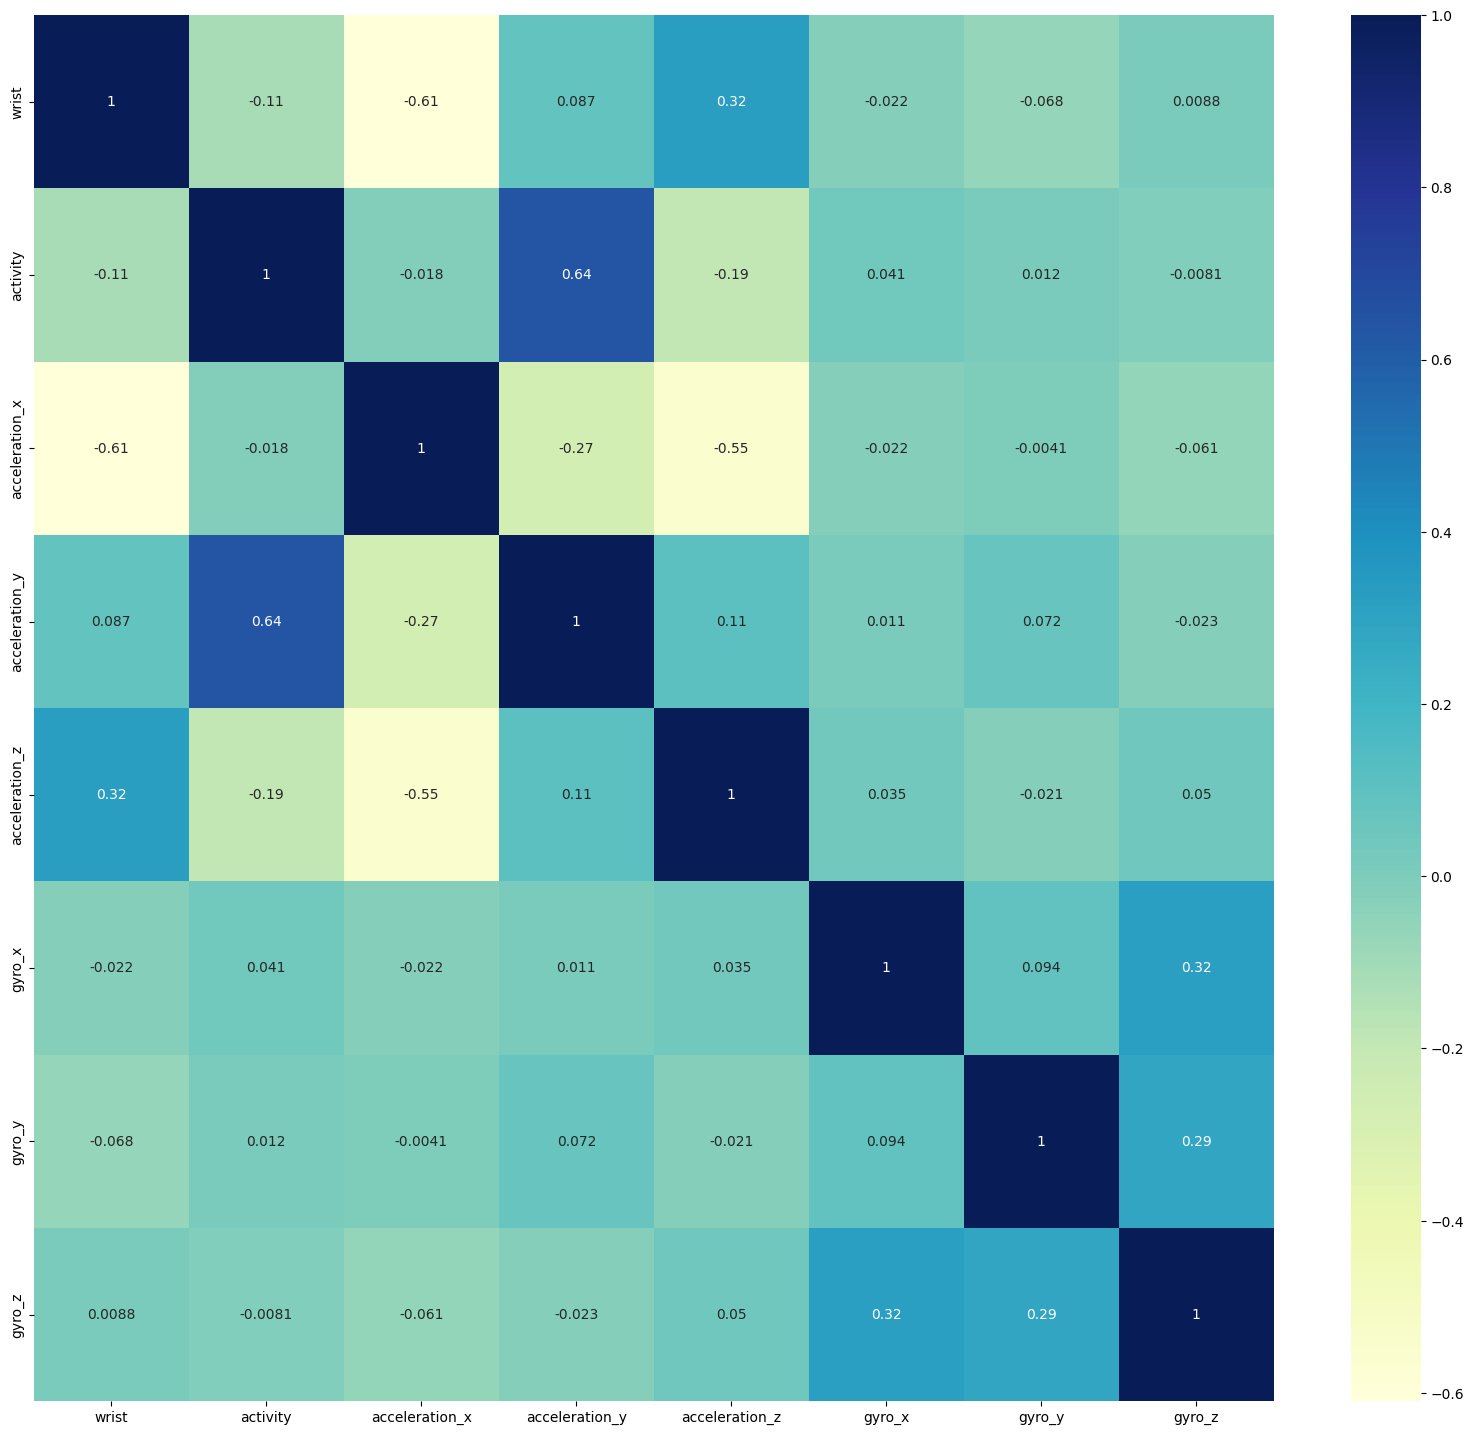

In [4]:
only_data = df.drop(['date', 'time', 'username'], axis=1)
plt.figure(figsize=(20,18))
sns.heatmap(only_data.corr(), cmap='YlGnBu',annot=True)
plt.show()

The x and y acceleration data have the highest correlation with the activity

## Checking the effect of wrist on the activity

### Using lineplot (scatterplots are better!)

Text(0.5, 0, 'Samples')

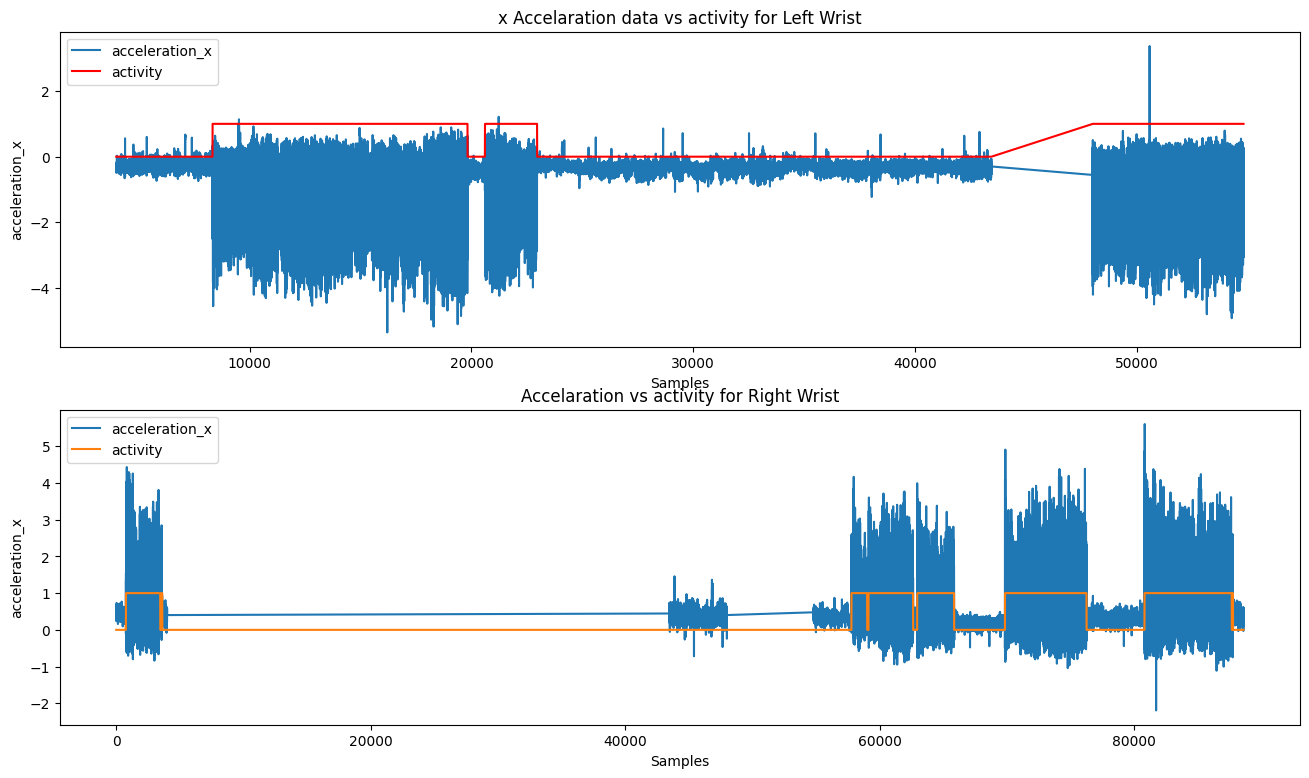

In [177]:
# Plotting x Acceleration vs activity for left wrist
my_figsize = (16, 9)
plt.figure(figsize=my_figsize)
plt.subplot(211)

plt.title("x Accelaration data vs activity for Left Wrist")
sns.lineplot(data=left["acceleration_x"], label="acceleration_x")
sns.lineplot(data=left["activity"], label="activity", color='red')
plt.xlabel("Samples")

# Plotting x Acceleration vs activity for right wrist
plt.subplot(212)

plt.title("Accelaration vs activity for Right Wrist")
sns.lineplot(data=right["acceleration_x"], label="acceleration_x")
sns.lineplot(data=right["activity"], label="activity")
plt.xlabel("Samples")


We can clearly see that whenever the user is running(activity = 1), the absolute amplitiudes of x acceleration data is relatively high. And the effect of wrist is pretty clear! We can ignore its effect by using absolute values

So we can simply add a threshold to the absolute of x acceleration data and classify between running and walking! There is no need of complicated machine learning models:))

Also we can understand that with only using one of the 6 features, the classification is possible(e.g. acceleration x)

### Now let's plot the absolute activity for better visualization

Text(0.5, 0, 'Samples')

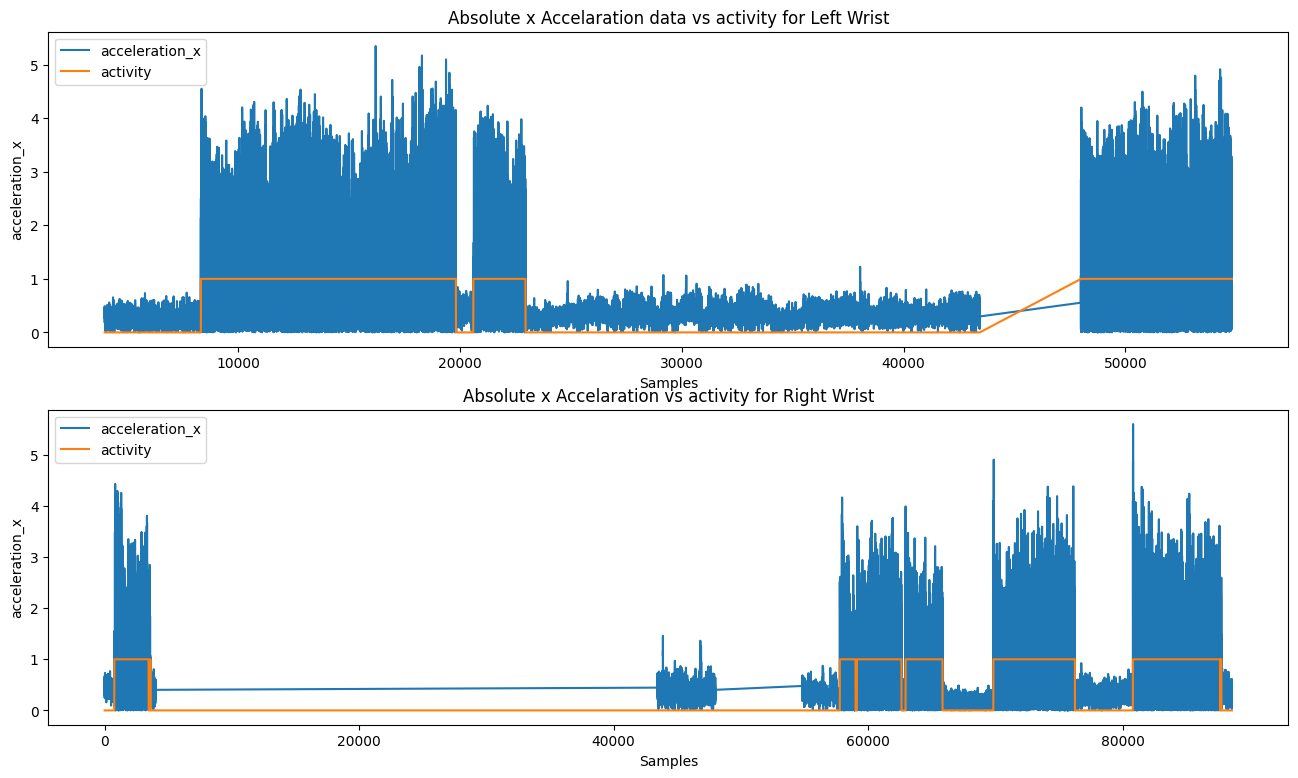

In [179]:
plt.figure(figsize=my_figsize)

plt.subplot(211)

plt.title("Absolute x Accelaration data vs activity for Left Wrist")
sns.lineplot(data=np.abs(left["acceleration_x"]), label="acceleration_x")
sns.lineplot(data=left["activity"], label="activity")
plt.xlabel("Samples")

# Plotting x Acceleration vs activity for right wrist
plt.subplot(212)

plt.title("Absolute x Accelaration vs activity for Right Wrist")
sns.lineplot(data=np.abs(right["acceleration_x"]), label="acceleration_x")
sns.lineplot(data=right["activity"], label="activity")
plt.xlabel("Samples")

Now that we are considering the absolute data, we can ignore the wrist parameter:
### Let's plot the whole data of x acceleration

Text(0.5, 0, 'Samples')

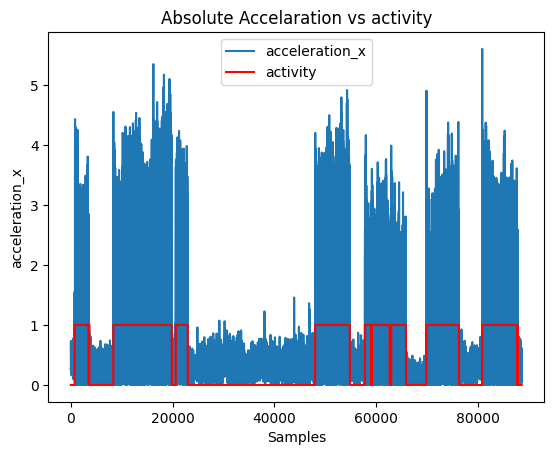

In [7]:
plt.title("Absolute Accelaration vs activity")
sns.lineplot(data=np.abs(df["acceleration_x"]), label="acceleration_x")
sns.lineplot(data=df["activity"], label="activity", color ='red')
plt.xlabel("Samples")

A suitable threshold can be 1.8 (the minimum amount of x acceleration that still the activity is 1)
### let's write the classification code

In [8]:
TR = 0
TW = 0
FR = 0
FW = 0

threshold = 1.8

for i in range(len(df)):
    x = np.abs(df['acceleration_x'].loc[i])
    
    if x>threshold and df['activity'].loc[i] == 1:
        # if True: the state is True Run
        TR = TR + 1
        
    elif x>threshold and df['activity'].loc[i] == 0:
        # if True: the state is False Run
        FR = FR + 1
        
    elif x<threshold and df['activity'].loc[i] == 0:
        # if True: the state is True Walk
        TW = TW + 1
        
    elif x<threshold and df['activity'].loc[i] == 1:
        # if True: the state is False Walk
        FW = FW + 1
        
print(f'True Run activities   = {TR}')
print(f'False Run activities  = {FR}')
print(f'True Walk activities  = {TW}')
print(f'False Walk activities = {FW}')
print(f'Total Run activities  = {len(run)},   Total Walk activities  = {len(walk)}')
print(f'Precision for Run    = {TR/(TR + FR)}')
print(f'Recall for Run       = {TR/(TR + FW)}')
print(f'F1 score             = {(2*TR/(TR + FR)*TR/(TR + FW))/(TR/(TR + FR) + TR/(TR + FW))}')
print(f'Accuracy             = {(TW+TR)/(TW + FW + FR + TR)}')
print(f'Specifity            = {TW/(TW + FR)}')

True Run activities   = 8958
False Run activities  = 0
True Walk activities  = 44223
False Walk activities = 35407
Total Run activities  = 44365,   Total Walk activities  = 44223
Precision for Run    = 1.0
Recall for Run       = 0.20191592471542882
F1 score             = 0.3359900980815033
Accuracy             = 0.6003183275387186
Specifity            = 1.0


**Oops! What happend?!**

I zoomed at the data and realized that I haven't noticed the fluctuations! I should have plotted the scatter plot not the line plot!

### Let's plot the scatterplots

Text(0.5, 0, 'Samples')

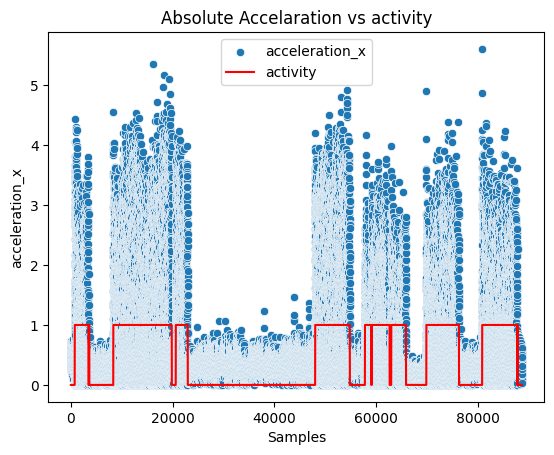

In [9]:
plt.title("Absolute Accelaration vs activity")
sns.scatterplot(data=np.abs(df["acceleration_x"]), label="acceleration_x")
sns.lineplot(data=df["activity"], label="activity", color ='red')
plt.xlabel("Samples")

This is the plot that I should have plotted initially! We can't understand much from LinePlots!

But the idea of thresholding is not that bad! Most of the data are above the threshold but there are also some small noisy data! If we segment the data into windows and calculate the average values, I think the idea of thresholding will work way better in that case!

The nosiy data is pretty cool! I think that's because when we run, we follow a periodic movement and our limbs will follow a same periodic movement in all directions of x, y, z. I think if we can also estimate the speed of running! I think the idea of having different people with different running and walking patterns(e.g. *short and long leg displacements*) is also pretty exciting.

Another important point is the fact that the amplitude of the data when the user was running are higher than when he/she was walking.

## Data distributions and scatter plots

### Right vs Left

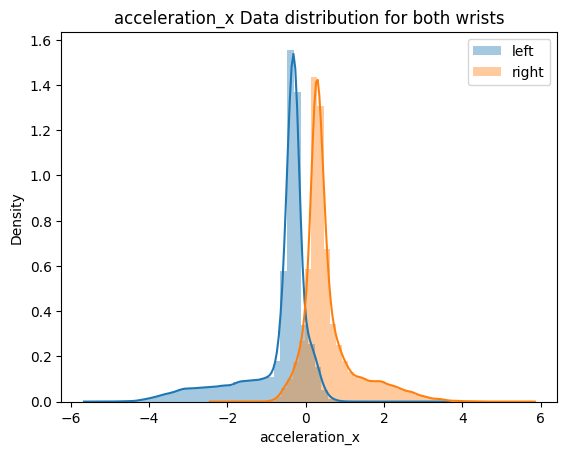

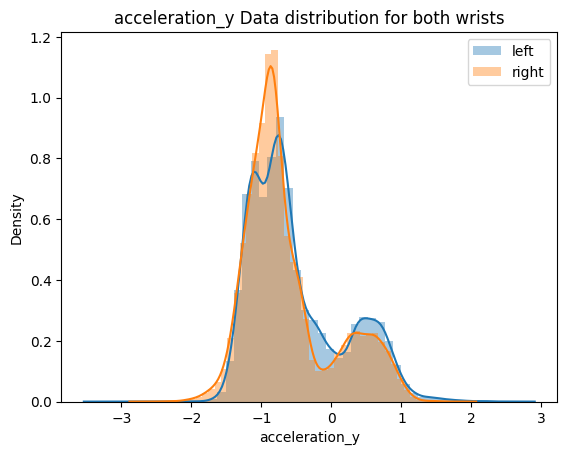

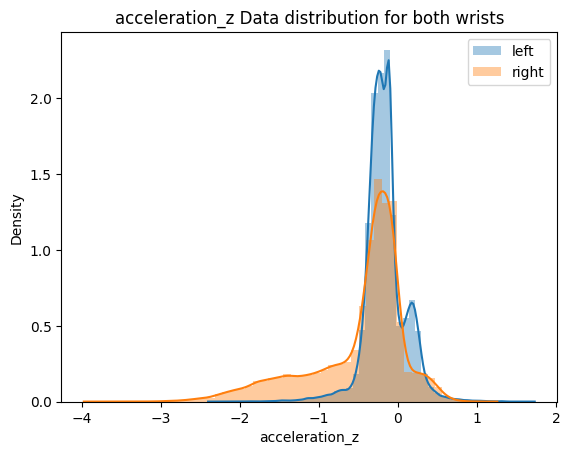

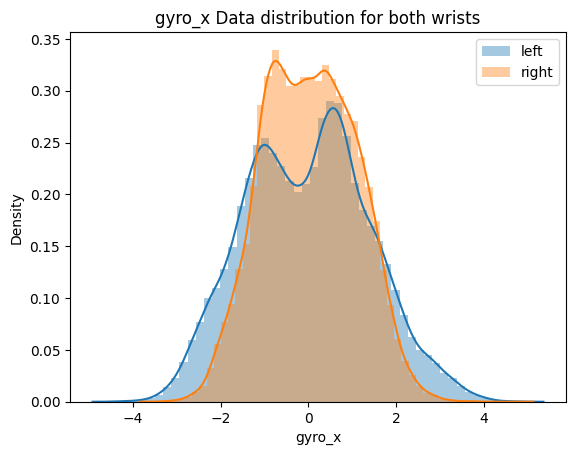

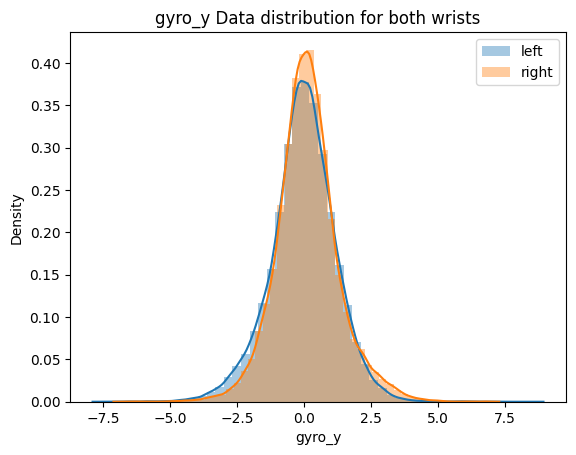

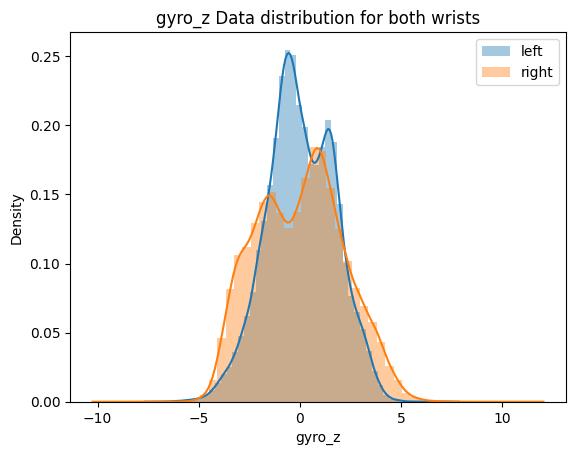

In [153]:
for c in df.columns[5:]:
    plt.title(f"{c} Data distribution for both wrists")
    sns.distplot(left[c], label='left')
    sns.distplot(right[c], label='right')
    plt.legend()
    plt.show()

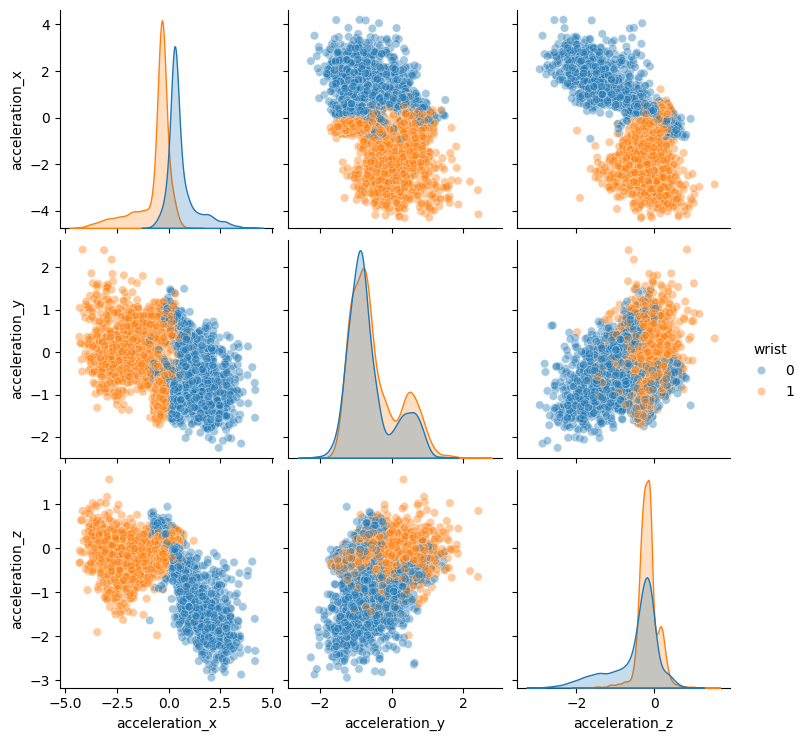

In [11]:
sns.pairplot(df[["acceleration_x", "acceleration_y", "acceleration_z", "wrist"]].sample(frac=.1).reset_index(drop=True), hue="wrist", plot_kws={'alpha':0.4})

These histograms show essentially no dependence on the wrist for acc. y and acc. z, while the acc. x distribution looks close to symmetric around 0, suggesting that the wrist axis was alligned with the x axis.

### Run vs Walk

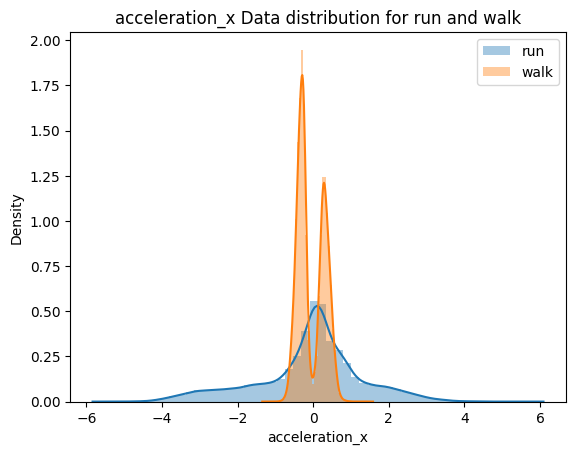

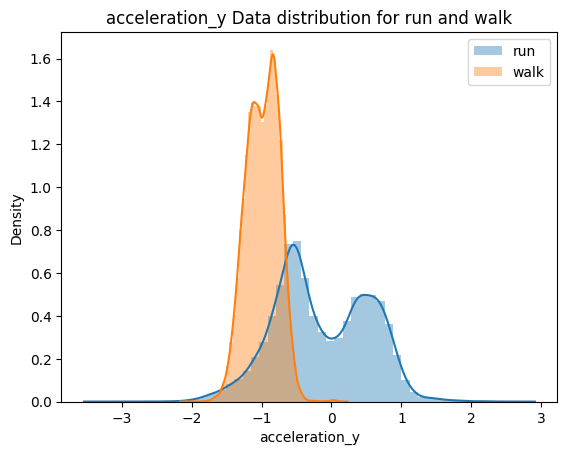

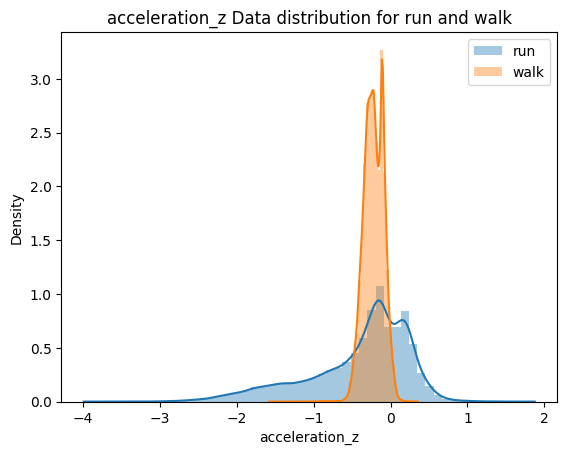

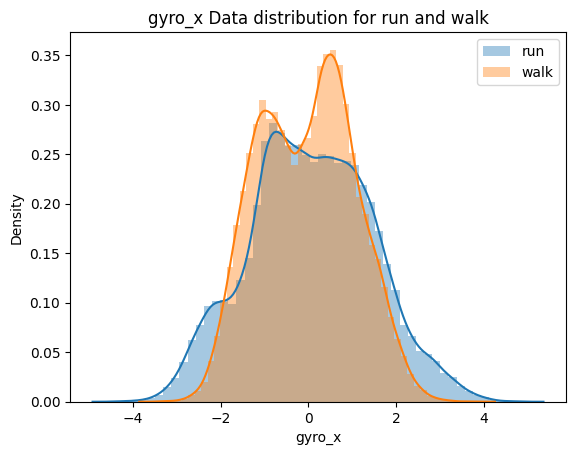

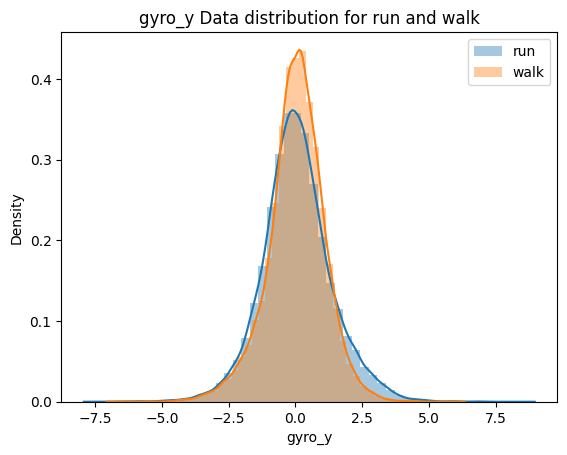

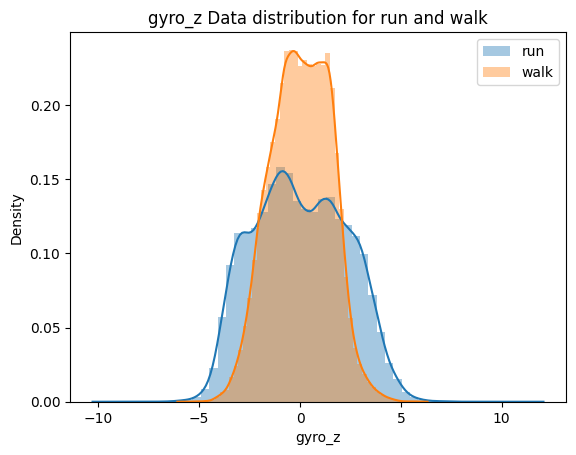

In [154]:
for c in df.columns[5:]:
    plt.title(f"{c} Data distribution for run and walk")
    sns.distplot(run[c], label='run')
    sns.distplot(walk[c], label='walk')
    plt.legend()
    plt.show()

The results are allinged with the output of the correlation matrix

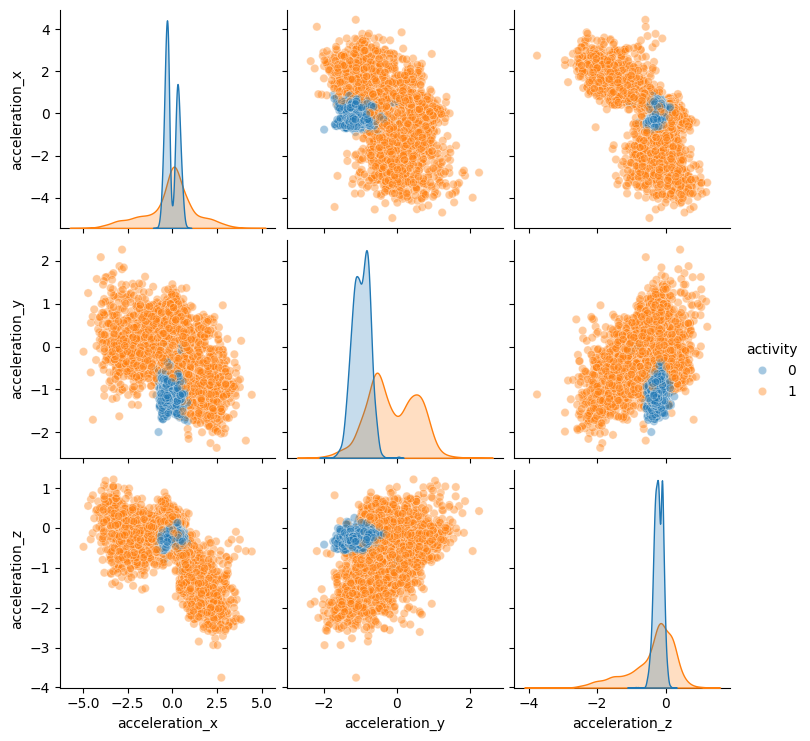

In [13]:
sns.pairplot(df[["acceleration_x", "acceleration_y", "acceleration_z", "activity"]].sample(frac=.1).reset_index(drop=True), hue="activity", plot_kws={'alpha':0.4})

# Preprocess

## Summary Statistics

In [14]:
df.describe()

,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
count,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000
mean,0.522170,0.500801,-0.074811,-0.562585,-0.313956,0.004160,0.037203,0.022327
std,0.499511,0.500002,1.009299,0.658458,0.486815,1.253423,1.198725,1.914423
min,0.000000,0.000000,-5.350500,-3.299000,-3.753800,-4.430600,-7.464700,-9.480000
25%,0.000000,0.000000,-0.381800,-1.033500,-0.376000,-0.920700,-0.644825,-1.345125
50%,1.000000,1.000000,-0.059500,-0.759100,-0.221000,0.018700,0.039300,0.006900
75%,1.000000,1.000000,0.355500,-0.241775,-0.085900,0.888800,0.733700,1.398200
max,1.000000,1.000000,5.603300,2.668000,1.640300,4.874200,8.498000,11.266200


## Checking null values

In [15]:
df.isnull().sum()

date              0
time              0
username          0
wrist             0
activity          0
acceleration_x    0
acceleration_y    0
acceleration_z    0
gyro_x            0
gyro_y            0
gyro_z            0
dtype: int64

## Checking for duplicates

In [16]:
df.duplicated().sum()

0

## checking for Nan 

In [17]:
df.isna().sum().sum()

0

## extracting statistical and fft featurs
In this stage, before feature extracting we segment the data into 3 second intervals

In [18]:
def statistical_feats(x):
    y = []
    y.append(np.mean(x))
    y.append(np.std(x))
    y.append(np.median(x))
    return y

In [196]:
window_length = 3 # seconds
sampling_freq = 5.4 # sample per seconds
n_sample = int(np.round(window_length * sampling_freq))

col_names = df.columns[5:]
acc_feat_names  = ['mean_acc_x', 'std_acc_x', 'median_acc_x', 'mean_acc_y', 'std_acc_y', 'median_acc_y', 'mean_acc_z', 'std_acc_z', 'median_acc_z']
gyro_feat_names = ['mean_gyro_x', 'std_gyro_x', 'median_gyro_x', 'mean_gyro_y', 'std_gyro_y', 'median_gyro_y', 'mean_gyro_z', 'std_gyro_z', 'median_gyro_z']

run_statistical_features  = pd.DataFrame(columns=[acc_feat_names + gyro_feat_names])
walk_statistical_features  = run_statistical_features.copy()

for i in range(int(np.round(len(run)/n_sample))):
    s=[]
    for j in range(len(col_names)):
        a = list(run[col_names[j]].iloc[i*n_sample: (i+1)*n_sample])
        s += statistical_feats(a) 
    run_statistical_features.loc[i] = s
run_statistical_features['activity'] = 1

for i in range(int(np.round(len(walk)/n_sample))):
    s=[]
    for j in range(len(col_names)):
        a = list(walk[col_names[j]].iloc[i*n_sample: (i+1)*n_sample])
        s += statistical_feats(a) 
    walk_statistical_features.loc[i] = s
walk_statistical_features['activity'] = 0

statistical_features = pd.concat([walk_statistical_features, run_statistical_features], ignore_index=True)

from scipy.fft import fft

run_fft_features = pd.DataFrame(columns=col_names)
walk_fft_features = run_fft_features.copy()
for i in range(int(np.round(len(run)/n_sample))):
    ffts = []
    for j in range(len(col_names)):
        a = list(run[col_names[j]].iloc[i*n_sample: (i+1)*n_sample])
        ffts = ffts + list(fft(a))
    z = np.array(ffts)
    z = np.reshape(z,(int(len(z)/len(col_names)),len(col_names)))
    w = pd.DataFrame(z, columns=col_names)
    run_fft_features = pd.concat([run_fft_features, w], ignore_index=True)
run_fft_features['activity'] = int(1)

for i in range(int(np.round(len(walk)/n_sample))):
    ffts = []
    for j in range(len(col_names)):
        a = list(walk[col_names[j]].iloc[i*n_sample: (i+1)*n_sample])
        ffts = ffts + list(fft(a))
    z = np.array(ffts)
    z = np.reshape(z,(int(len(z)/len(col_names)),len(col_names)))
    w = pd.DataFrame(z, columns=col_names)
    walk_fft_features = pd.concat([walk_fft_features, w], ignore_index=True)
walk_fft_features['activity'] = int(0)

fft_features = pd.concat([walk_fft_features, run_fft_features], ignore_index=True)

## Correlation tables for extracted features

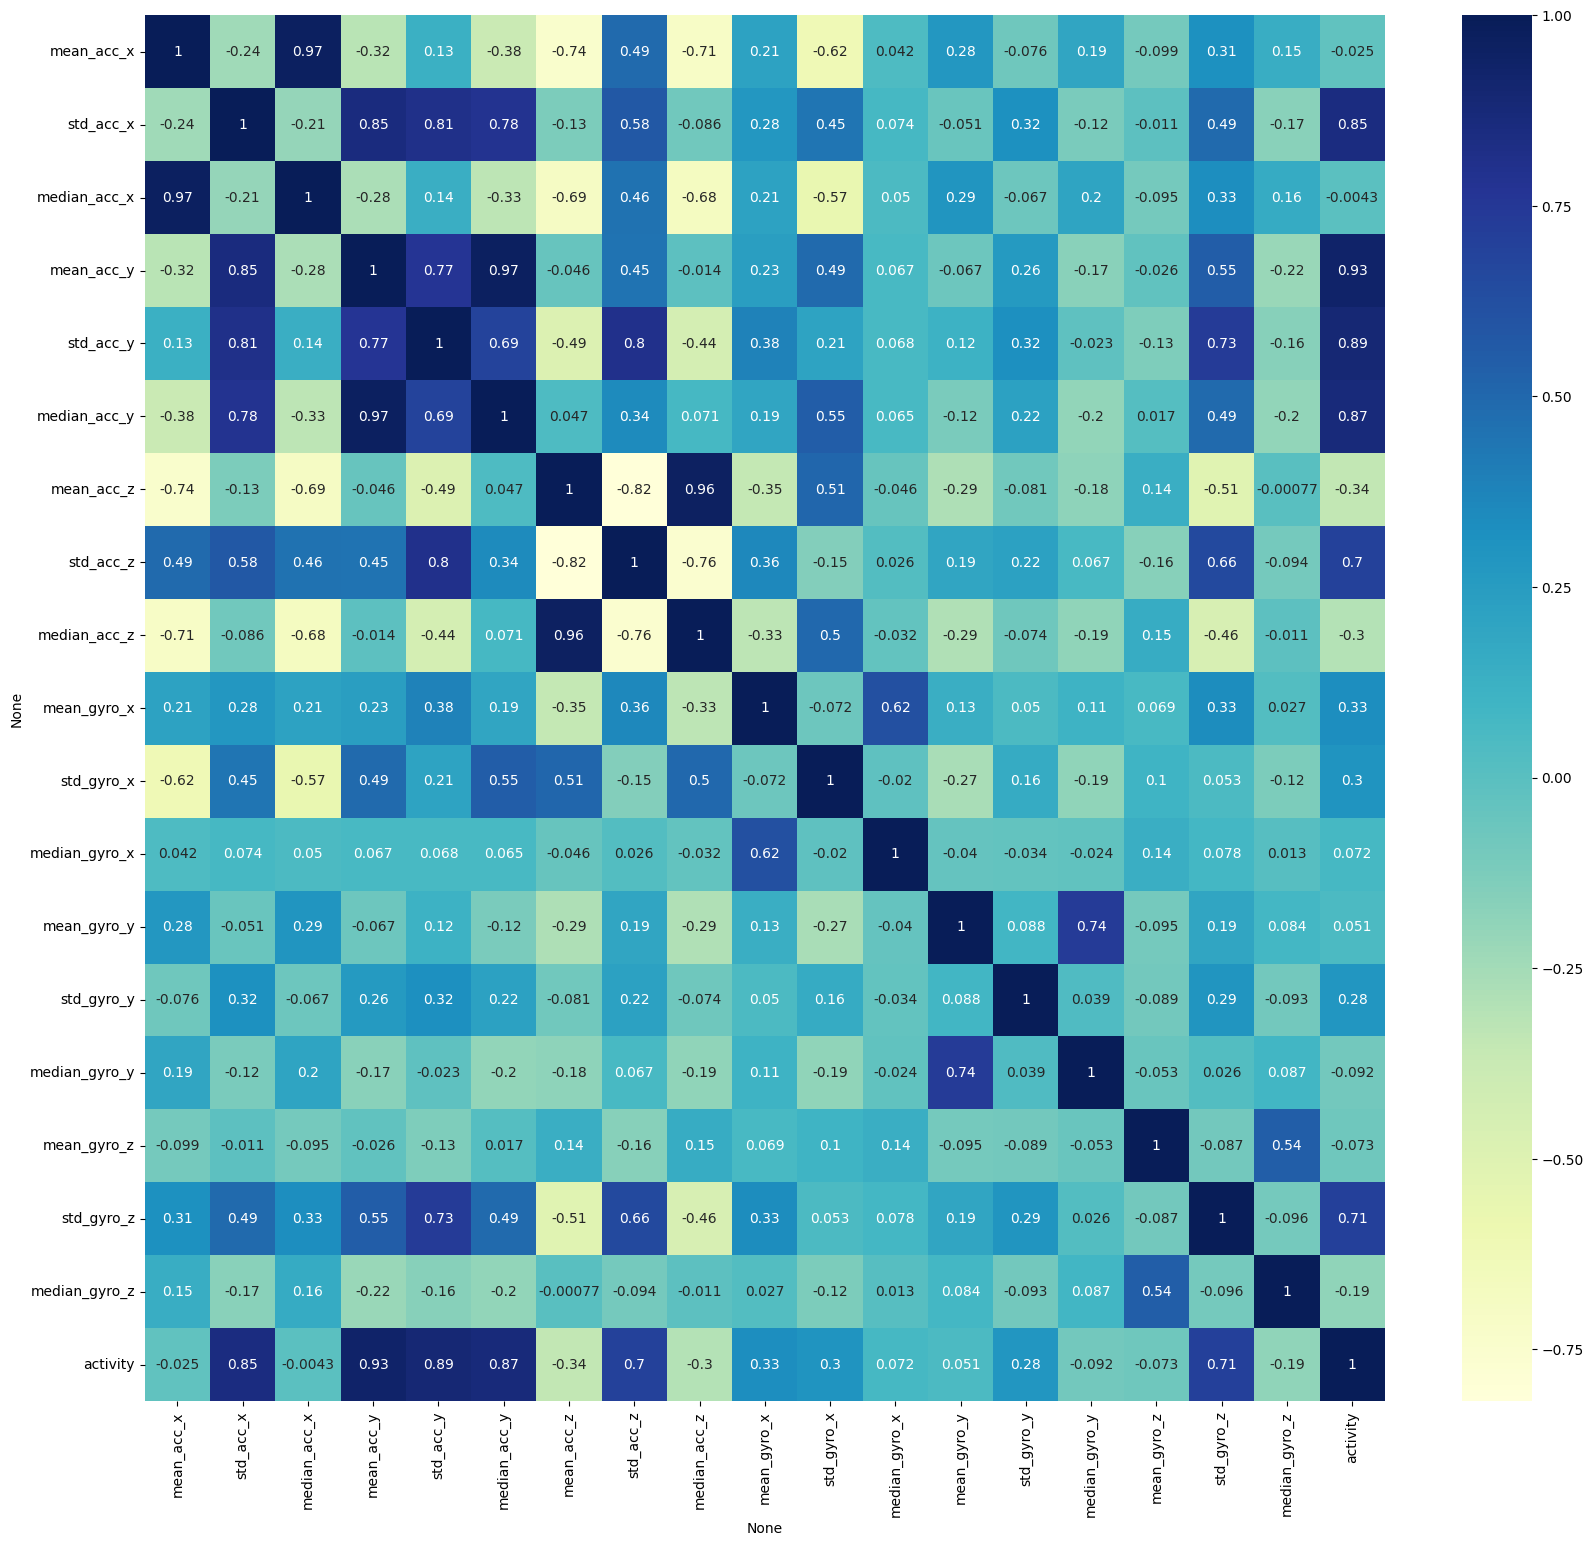

In [21]:
plt.figure(figsize=(20,18))
sns.heatmap(statistical_features.corr(), cmap='YlGnBu',annot=True)
plt.show()

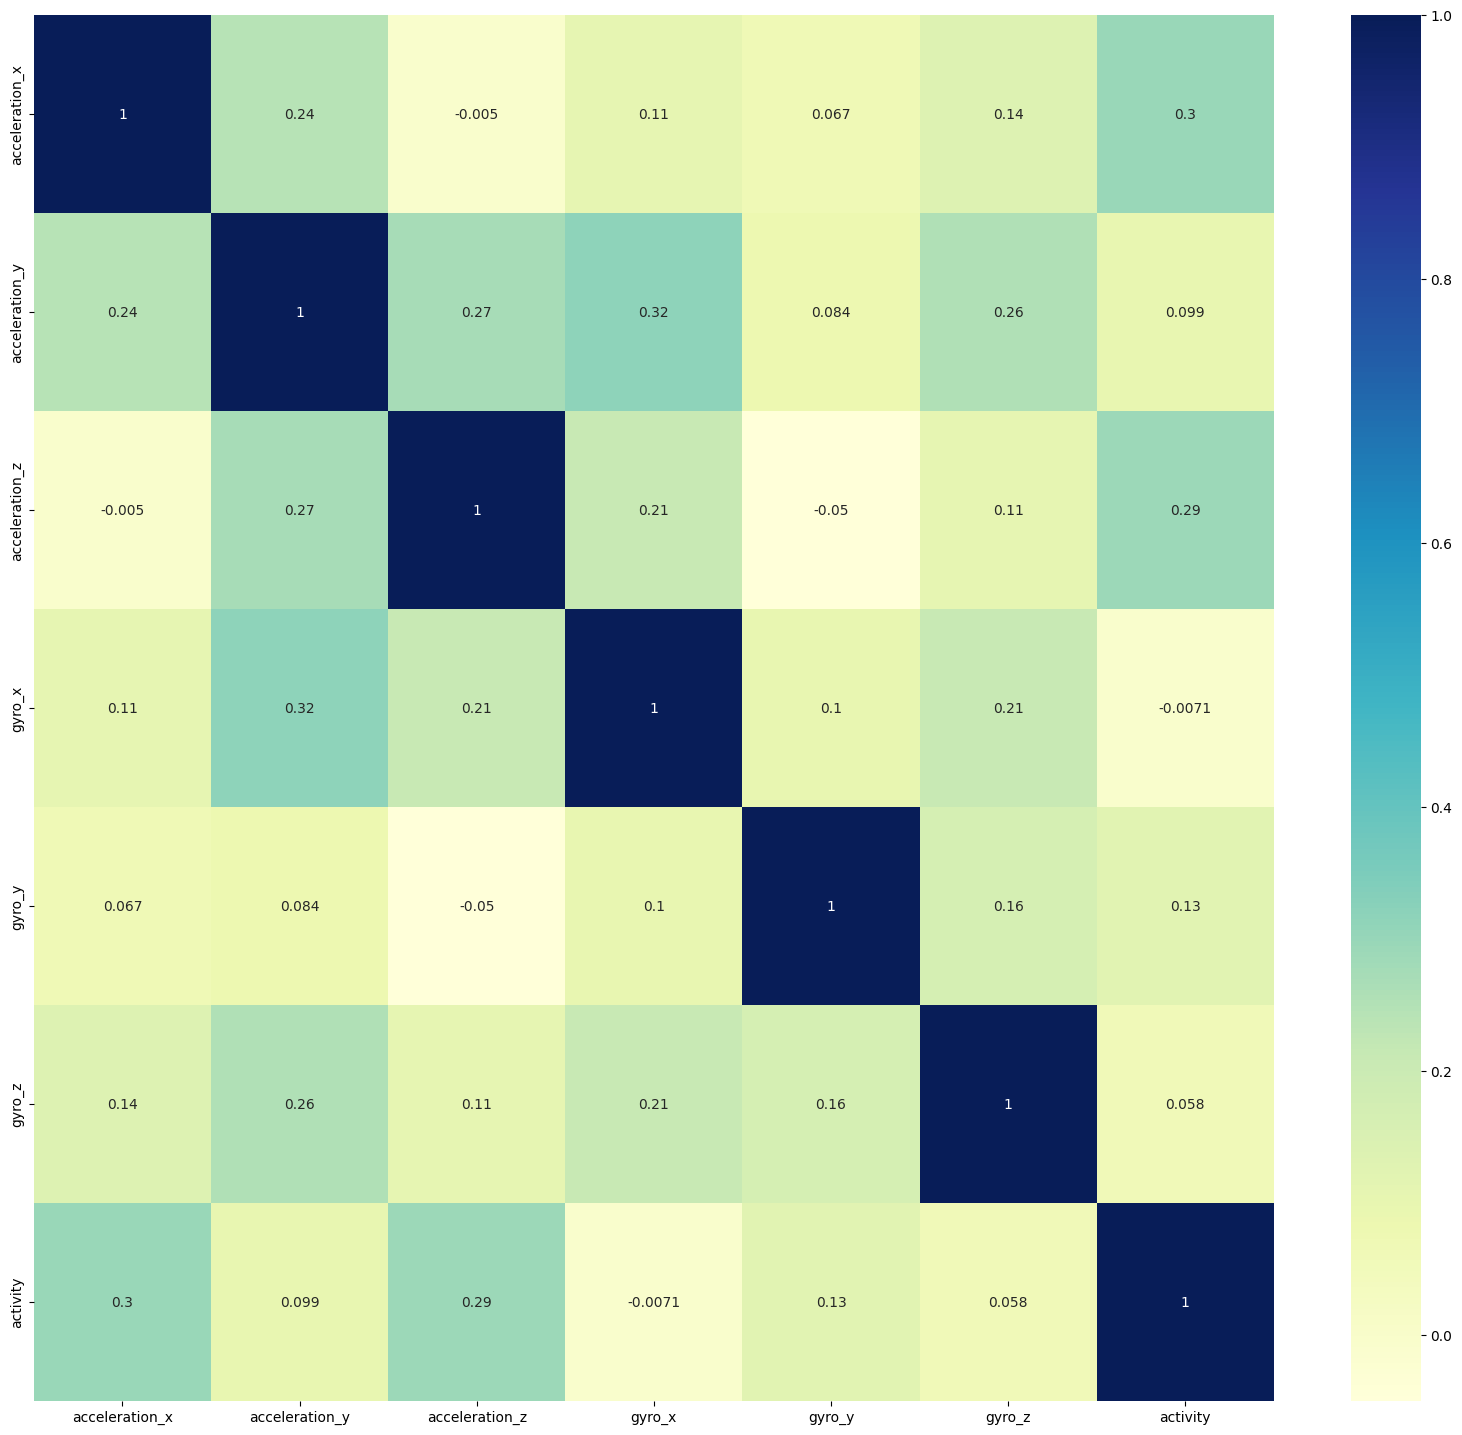

In [64]:
plt.figure(figsize=(20,18))
sns.heatmap(np.abs(fft_features).corr(), cmap='YlGnBu',annot=True)
plt.show()

We can see that the fft coeff are not that useful and are not correlated to the activity as much as statistical features.

## Data Preprocessing for models

Scaling + randomizing + Test/train split: (80% for Train) and (20% for test).

I did this for the 3 sets of features (actuall acc and gyro data, statistical features and fft coeffs)

In [137]:
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import metrics

X = df.drop(["username", "date", "time", "wrist", "activity"], axis = 1)
X = preprocessing.scale(X)
Y = df['activity']
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.2, random_state=3000)
print(f"Shapes:\n X_train: {X_train.shape}\n X_test:  {X_test.shape}\n Y_train: {Y_train.shape}\n Y_test:  {Y_test.shape}")

X_stat = statistical_features.drop(["activity"], axis = 1)
X_stat = preprocessing.scale(X_stat)
Y_stat = statistical_features['activity']
X_stat_train, X_stat_test, Y_stat_train, Y_stat_test = model_selection.train_test_split(X_stat, Y_stat, test_size=0.2, random_state=1000)
print(f"\n X_stat_train: {X_stat_train.shape}\n X_stat_test:  {X_stat_test.shape}\n Y_stat_train: {Y_stat_train.shape}\n Y_stat_test:  {Y_stat_test.shape}")

X_fft = np.abs(fft_features.drop(["activity"], axis = 1))
X_fft = preprocessing.scale(X_fft)
Y_fft = fft_features['activity']
X_fft_train, X_fft_test, Y_fft_train, Y_fft_test = model_selection.train_test_split(X_fft, Y_fft, test_size=0.2, random_state=1000)
print(f"\n X_fft_train: {X_fft_train.shape}\n X_fft_test:  {X_fft_test.shape}\n Y_fft_train: {Y_fft_train.shape}\n Y_fft_test:  {Y_fft_test.shape}")

# we can also use this for scaling: 
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_scaled = sc.fit_transform(X)



Shapes:
 X_train: (70870, 6)
 X_test:  (17718, 6)
 Y_train: (70870,)
 Y_test:  (17718,)

 X_stat_train: (4429, 18)
 X_stat_test:  (1108, 18)
 Y_stat_train: (4429, 1)
 Y_stat_test:  (1108, 1)

 X_fft_train: (70870, 6)
 X_fft_test:  (17718, 6)
 Y_fft_train: (70870,)
 Y_fft_test:  (17718,)


C:\Users\Sepehr\AppData\Local\Temp\ipykernel_16288\555957538.py:12: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  X_stat = statistical_features.drop(["activity"], axis = 1)


## SVM

**(SVM)** is a supervised machine learning algorithm used for classification and regression tasks. It works by finding a hyperplane that best separates different classes in the feature space. The key idea is to maximize the margin between the classes, which is the distance between the hyperplane and the nearest data point from each class.

**Applications**: SVM has been successfully used in various fields, including image recognition, text classification, bioinformatics, handwriting recognition, and financial fraud detection. Its ability to handle high-dimensional data and its effectiveness in dealing with both linear and non-linear relationships make it useful in different domains.


In [164]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

print("The results for the main data:\n")
classifier_svm = SVC()
classifier_svm.fit(X_train, Y_train)
y_pred = classifier_svm.predict(X_test)
y_score = classifier_svm.decision_function(X_test)
print(classification_report(Y_test,y_pred))

print("\nThe results for the statistical features:\n")
classifier_svm = SVC()
classifier_svm.fit(X_stat_train, Y_stat_train)
y_stat_pred = classifier_svm.predict(X_stat_test)
y_stat_score = classifier_svm.decision_function(X_stat_test)
print(classification_report(Y_stat_test,y_stat_pred))

print("\nThe results for the fft features:\n")
classifier_svm = SVC()
classifier_svm.fit(X_fft_train, Y_fft_train)
y_fft_pred = classifier_svm.predict(X_fft_test)
y_fft_score = classifier_svm.decision_function(X_fft_test)
print(classification_report(Y_fft_test,y_fft_pred))




The results for the main data:

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      8810
           1       0.99      0.98      0.99      8908

    accuracy                           0.99     17718
   macro avg       0.99      0.99      0.99     17718
weighted avg       0.99      0.99      0.99     17718


The results for the statistical features:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       560
           1       1.00      1.00      1.00       548

    accuracy                           1.00      1108
   macro avg       1.00      1.00      1.00      1108
weighted avg       1.00      1.00      1.00      1108


The results for the fft features:

              precision    recall  f1-score   support

           0       0.84      0.79      0.81      8682
           1       0.81      0.85      0.83      9036

    accuracy                           0.82     17718
   macro avg    

I realized that plotting the ROC and AUC is also a way of measuring the model performance. So I plotted them.

I wish I had more free time to completely fo through these measures and the hyperparameters! I like to play with them and notice the changes in results and performance!

Text(0, 0.5, 'True positive rate')

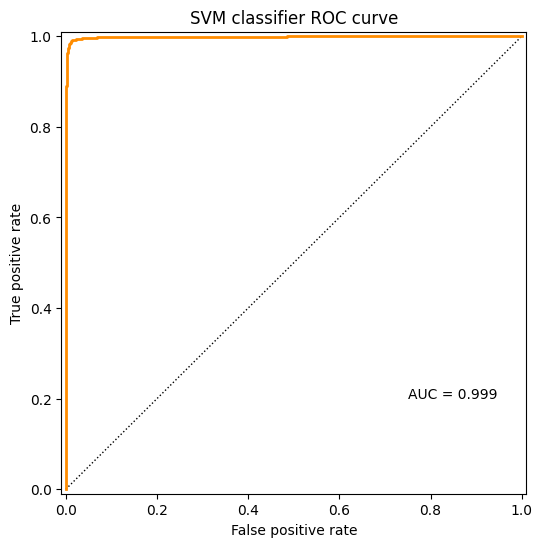

In [75]:
# Calculate ROC and associated AUC for the main data

fpr, tpr, _ = metrics.roc_curve(Y_test, y_score)
auc = metrics.auc(fpr, tpr)

# Plot ROC
plt.figure(figsize=(6,6))
plt.subplot(1,1,1)

plt.plot([0, 1], [0, 1], ":k", lw=1)
plt.plot(fpr, tpr, "-", c="darkorange", lw=2, drawstyle="steps-pre")
plt.text(0.75, 0.2, "AUC = %.3f"%(auc))

plt.title("SVM classifier ROC curve")
plt.xlim([-0.01,1.01])
plt.ylim([-0.01,1.01])
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")

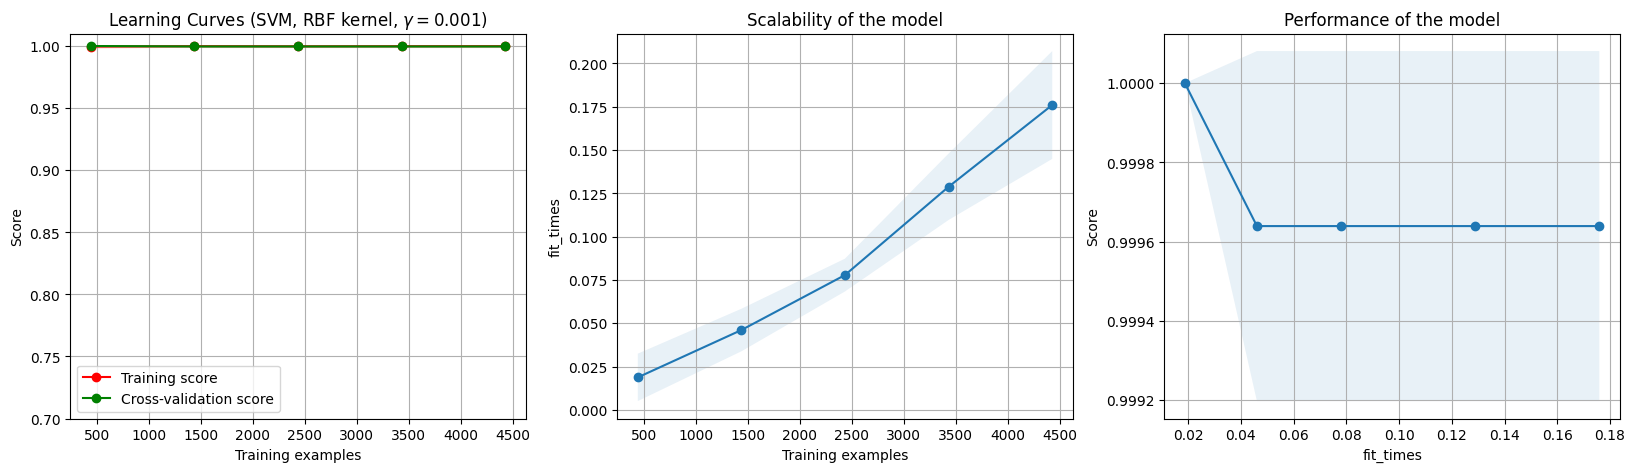

In [160]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(
    estimator,
    title,
    X,
    Y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    scoring=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    scoring : str or callable, default=None
        A str (see model evaluation documentation) or
        a scorer callable object / function with signature
        ``scorer(estimator, X, y)``.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        Y,
        scoring=scoring,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    fit_time_argsort = fit_times_mean.argsort()
    fit_time_sorted = fit_times_mean[fit_time_argsort]
    test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
    test_scores_std_sorted = test_scores_std[fit_time_argsort]
    axes[2].grid()
    axes[2].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
    axes[2].fill_between(
        fit_time_sorted,
        test_scores_mean_sorted - test_scores_std_sorted,
        test_scores_mean_sorted + test_scores_std_sorted,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


fig, axes = plt.figsize=(10, 15)

# Cross validation with 50 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)

title = r"Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
estimator = SVC(gamma=0.001)
plot_learning_curve(
    estimator, title, X_stat, Y_stat, ylim=(0.7, 1.01), cv=cv, n_jobs=4
)

plt.show()

## Linear Regression Model

In [166]:
from sklearn.linear_model import LogisticRegression

print("The results for the main data:\n")
lr = LogisticRegression()
lr.fit(X_train,Y_train)
y_pred = lr.predict(X_test)
y_score = lr.decision_function(X_test)
print(classification_report(Y_test,y_pred))

print("\nThe results for the statistical features:\n")
lr = LogisticRegression()
lr.fit(X_stat_train, Y_stat_train)
y_stat_pred = lr.predict(X_stat_test)
y_stat_score = lr.decision_function(X_stat_test)
print(classification_report(Y_stat_test,y_stat_pred))

print("\nThe results for the fft features:\n")
lr = LogisticRegression()
lr.fit(X_fft_train, Y_fft_train)
y_fft_pred = lr.predict(X_fft_test)
y_fft_score = lr.decision_function(X_fft_test)
print(classification_report(Y_fft_test,y_fft_pred))


The results for the main data:

              precision    recall  f1-score   support

           0       0.82      0.89      0.85      8810
           1       0.88      0.80      0.84      8908

    accuracy                           0.85     17718
   macro avg       0.85      0.85      0.85     17718
weighted avg       0.85      0.85      0.85     17718


The results for the statistical features:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       560
           1       1.00      1.00      1.00       548

    accuracy                           1.00      1108
   macro avg       1.00      1.00      1.00      1108
weighted avg       1.00      1.00      1.00      1108


The results for the fft features:

              precision    recall  f1-score   support

           0       0.64      0.74      0.69      8682
           1       0.71      0.61      0.65      9036

    accuracy                           0.67     17718
   macro avg    

## Decision Tree

In [175]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(splitter='best',criterion='entropy',min_samples_split=3,min_samples_leaf=3)

print("The results for the main data:")
dt.fit(X_train,Y_train)
y_pred = dt.predict(X_test)
print(classification_report(Y_test,y_pred))

print("\nThe results for the statistical features:")
dt.fit(X_stat_train, Y_stat_train)
y_stat_pred = dt.predict(X_stat_test)
print(classification_report(Y_stat_test,y_stat_pred))

print("\nThe results for the fft features:")
dt.fit(X_fft_train, Y_fft_train)
y_fft_pred = dt.predict(X_fft_test)
print(classification_report(Y_fft_test,y_fft_pred))

The results for the main data:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      8810
           1       0.98      0.98      0.98      8908

    accuracy                           0.98     17718
   macro avg       0.98      0.98      0.98     17718
weighted avg       0.98      0.98      0.98     17718


The results for the statistical features:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       560
           1       1.00      1.00      1.00       548

    accuracy                           1.00      1108
   macro avg       1.00      1.00      1.00      1108
weighted avg       1.00      1.00      1.00      1108


The results for the fft features:
              precision    recall  f1-score   support

           0       0.79      0.80      0.79      8682
           1       0.81      0.79      0.80      9036

    accuracy                           0.80     17718
   macro avg       

## Random Forest

In [176]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200,min_samples_split=2,min_samples_leaf=1,max_features='sqrt',criterion='entropy')


print("The results for the main data:")
rf.fit(X_train,Y_train)
y_pred = rf.predict(X_test)
print(classification_report(Y_test,y_pred))

print("\nThe results for the statistical features:")
rf.fit(X_stat_train, Y_stat_train)
y_stat_pred = rf.predict(X_stat_test)
print(classification_report(Y_stat_test,y_stat_pred))

print("\nThe results for the fft features:")
rf.fit(X_fft_train, Y_fft_train)
y_fft_pred = rf.predict(X_fft_test)
print(classification_report(Y_fft_test,y_fft_pred))


The results for the main data:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      8810
           1       0.99      0.99      0.99      8908

    accuracy                           0.99     17718
   macro avg       0.99      0.99      0.99     17718
weighted avg       0.99      0.99      0.99     17718


The results for the statistical features:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       560
           1       1.00      1.00      1.00       548

    accuracy                           1.00      1108
   macro avg       1.00      1.00      1.00      1108
weighted avg       1.00      1.00      1.00      1108


The results for the fft features:
              precision    recall  f1-score   support

           0       0.86      0.83      0.85      8682
           1       0.84      0.87      0.86      9036

    accuracy                           0.85     17718
   macro avg       

In [225]:
X = df[['acceleration_y','activity']]
X = preprocessing.scale(X)
Y = df['activity']
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.2, random_state=3000)
print(f"Shapes:\n X_train: {X_train.shape}\n X_test:  {X_test.shape}\n Y_train: {Y_train.shape}\n Y_test:  {Y_test.shape}")


print("\nThe results for the acceleration y data:\n")
classifier_svm = SVC()
classifier_svm.fit(X_train, Y_train)
y_pred = classifier_svm.predict(X_test)
y_score = classifier_svm.decision_function(X_test)
print(classification_report(Y_test,y_pred))


Shapes:
 X_train: (70870, 2)
 X_test:  (17718, 2)
 Y_train: (70870,)
 Y_test:  (17718,)

The results for the acceleration y data:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8810
           1       1.00      1.00      1.00      8908

    accuracy                           1.00     17718
   macro avg       1.00      1.00      1.00     17718
weighted avg       1.00      1.00      1.00     17718



# Conclusion:

The results show that the performances of models for statistical features of time-segmented data is so much higher. As we saw in the initial stages, the data was noisy and fluctuating (because running is a dynamic movement and also the data was recorded in a proper **sampling frequency** that contained this behavior and information.)

Because the scattering property of the data has decreased, the performances increased as we expected. 

Another interesting point is the fact that the classification is possible with optimum accuracy with only acceleration y or x data!